In [87]:
import pandas as pd
df = pd.read_csv('reddit.csv')

In [88]:
import numpy as np
#import datetime
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

import csv

In [91]:
#Detect average sentiment per domain
unique = np.unique(df["Domain"])
print(unique)

with open('domains.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile, quoting=csv.QUOTE_MINIMAL)
    writer.writerow( ('Domain', 'Size', 'AverageSentiment') )
    for domain in unique:
        print("Domain:", domain)
        selection = df[df["Domain"].str.contains(domain)]
        indices = []
        values = []
        if len(selection) > 200:
            for index, row in selection.iterrows():
                value = analyzer.polarity_scores(row["Title"])["compound"]
                values.append(value)
                indices.append(index)
            writer.writerow( (domain, len(values), np.mean(values)) )
            print (domain, len(values), np.mean(values))

['02varvara.wordpress.com' '0mac.com' '1.bp.blogspot.com' ..., 'zwire.com'
 'zyalt.livejournal.com' 'zythophile.wordpress.com']
Domain: 02varvara.wordpress.com
Domain: 0mac.com
Domain: 1.bp.blogspot.com
Domain: 1.usa.gov
Domain: 1000memories.com
Domain: 100abdominalexercises.com
Domain: 100r.org
Domain: 101greatgoals.com
Domain: 10news.com
Domain: 10news.dk
Domain: 10tv.com
Domain: 11alive.com
Domain: 11logic.wordpress.com
Domain: 12entry.com
Domain: 12newsnow.com
Domain: 1360sports.com
Domain: 13abc.com
Domain: 13above.com
Domain: 13wham.com
Domain: 143cars.com
Domain: 14juillet.paris.fr
Domain: 14news.com
Domain: 15min.lt
Domain: 1888pressrelease.com
Domain: 1strank.in
Domain: 1sun4all.com
Domain: 1ta.blogfa.com
Domain: 1tvnews.af
Domain: 1up.com
Domain: 1viral.co
Domain: 2008beijingolimpics.com
Domain: 2009hopes.com
Domain: 2012indyinfo.com
Domain: 205.186.133.84
Domain: 209.85.135.104
Domain: 209.85.229.132
Domain: 20min.ch
Domain: 20minutos.tv
Domain: 212.77.1.245
Domain: 213.251.

error: unterminated character set at position 0

In [85]:
#Select topic and compare average sentiment with general average sentiment for each domain
topic = "Trump"
domains = pd.read_csv('domains.csv')
for domain in domains["Domain"]:
    selection = df[df["Domain"].str.contains(domain)]
    selection = selection[selection["Title"].str.contains(topic)]

    indices = []
    values = []
    if len(selection) > 10:
        for index, row in selection.iterrows():
            value = analyzer.polarity_scores(row["Title"])["compound"]
            values.append(value)
            indices.append(index)
        value = domains[domains["Domain"]==domain]["AverageSentiment"]
        #print (value)
        print( domain, len(values), np.mean(values) - float(value) )

bbc.com 13 0.306446295194
bloomberg.com 13 -0.122186390533
businessinsider.com 14 0.036290648379
cnn.com 21 0.193568043603
independent.co.uk 117 0.0802901618476
reut.rs 64 0.234534858452
reuters.com 64 0.234165061733
theguardian.com 52 -0.0239945726934


/home/constantin/.local/lib/python3.5/site-packages/numpy/core/fromnumeric.py:2889: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/constantin/.local/lib/python3.5/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


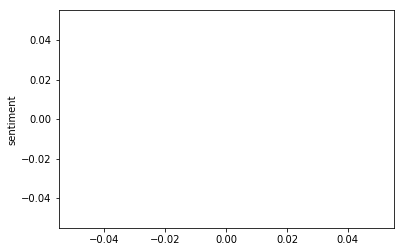

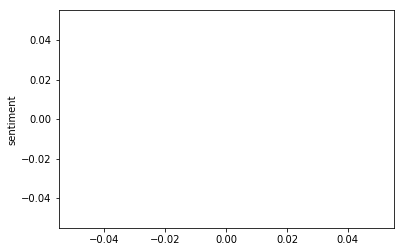

In [86]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
lowess = sm.nonparametric.lowess(values, indices, frac=0.1)
plt.plot(lowess[:, 0], lowess[:, 1])
plt.ylabel('sentiment')
plt.show()

plt.plot(indices, values)
plt.ylabel('sentiment')
plt.show()